# Predicting Miles per Gallon of a Car: Classification Problem

## Briefly Exploring Data

I will use the "Auto MPG" dataset provided by CMU StatLib library. This data can be downloaded in https://archive.ics.uci.edu/dataset/9/auto+mpg

In [159]:
import numpy as np
import pandas as pd

# Plotting purposes: 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating matrices for training:
from patsy import dmatrices

# Creating and training models:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm  #Implementing Logistic Regression
from sklearn.naive_bayes import GaussianNB as NB

# Model performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
Auto = pd.read_csv('Auto.csv')
print(Auto.columns)
print(Auto.shape)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
(397, 9)


In [3]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Deleting NaNs and Changing Type of 'horsepower'

The elements of the column 'horsepower' are of type 'str' because this column has a NaN value. Therefore, I need to delete the NaN value, reset the index and change the type of the elements of the column.

In [4]:
#Identifying the rows with NaN values to eventually drop them
Auto = Auto[Auto['horsepower'] != '?']
Auto = Auto.reset_index(drop = True)
Auto['horsepower'] = Auto['horsepower'].astype(float)

### Creating Binary Variable mpg01

mpg01: contains a 1 if 'mpg' contains a value above its median.

In [5]:
mpg_median = Auto['mpg'].median()
print("Median of MPG = ", mpg_median)
Auto['mpg01'] = np.where(Auto['mpg'] > mpg_median, 1, 0)
Auto['mpg01']

Median of MPG =  22.75


0      0
1      0
2      0
3      0
4      0
      ..
387    1
388    1
389    1
390    1
391    1
Name: mpg01, Length: 392, dtype: int32

In [6]:
# Here I will just print the range of years inside the 'year' column for later use in plotting
Auto['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

## Data Exploration: Graphically

Look for the association between mpg01 and the other features. Scatterplots, boxplots

### Scatterplots and Boxplots of the features

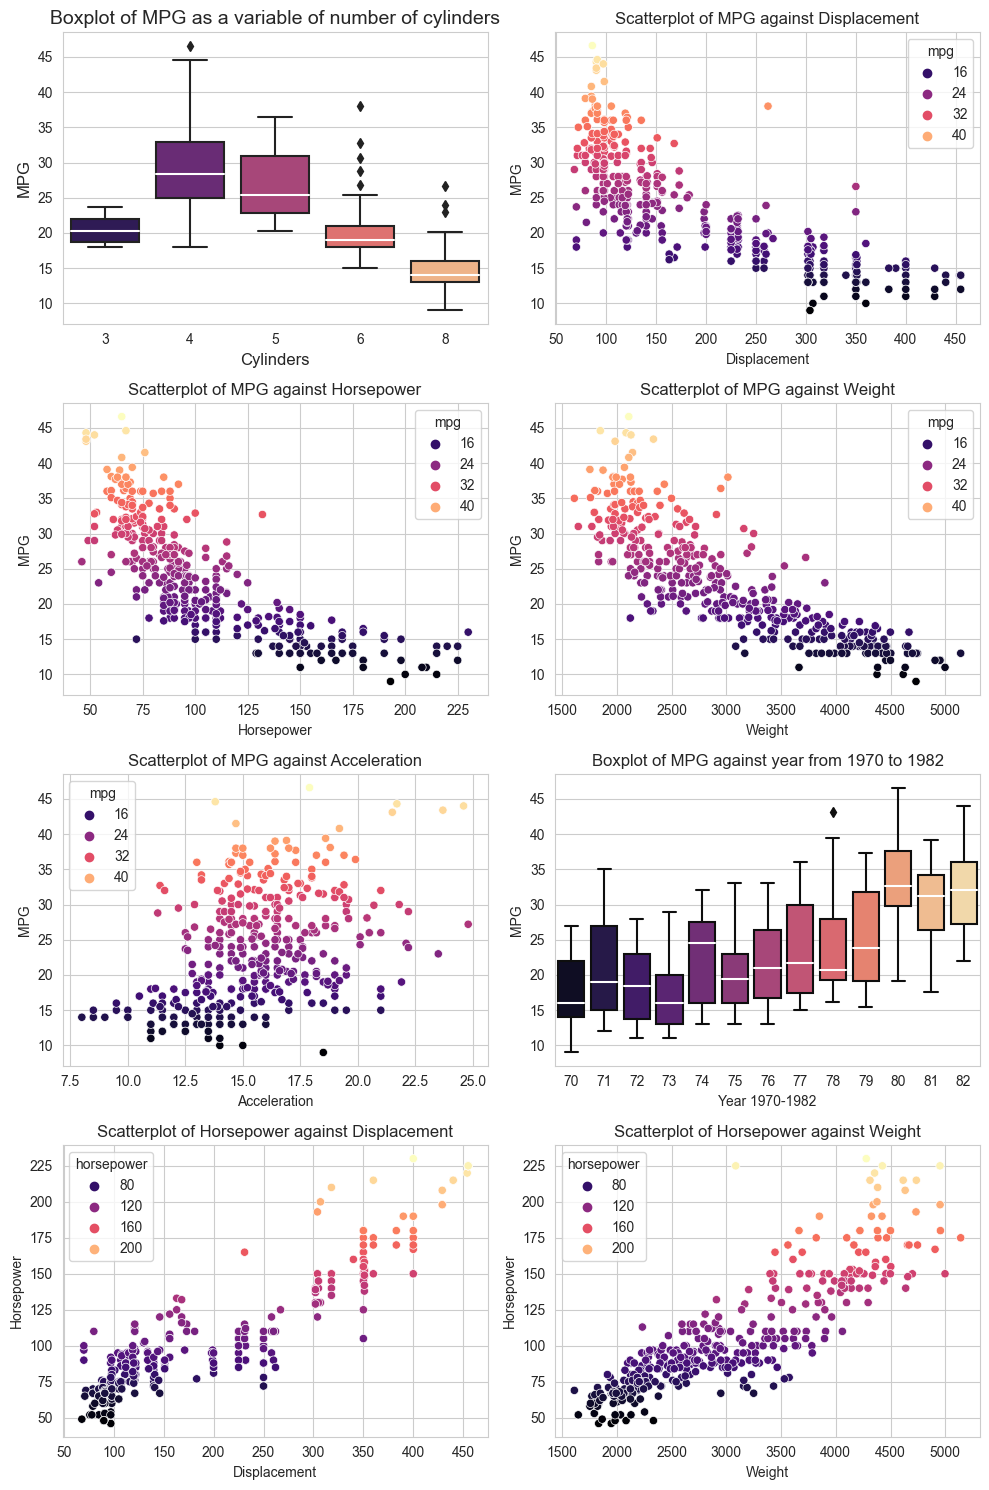

In [7]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 2, figsize=(10, 15))

#Boxplot of cylinders, mpg
sns.boxplot(x='cylinders', y='mpg', data=Auto, palette='magma', medianprops={'color': 'white'}, ax=axes[0, 0])
axes[0, 0].set_xlabel('Cylinders', fontsize=12)
axes[0, 0].set_ylabel('MPG', fontsize=12)
axes[0, 0].set_title('Boxplot of MPG as a variable of number of cylinders', fontsize=14)

#Scatterplot of displacement, mpg
sns.scatterplot(x='displacement', y='mpg', data=Auto, palette='magma', hue='mpg', ax=axes[0, 1])
axes[0, 1].set_xlabel('Displacement')
axes[0, 1].set_ylabel('MPG')
axes[0, 1].set_title('Scatterplot of MPG against Displacement')

#Scatterplot of horsepower, mpg
sns.scatterplot(x='horsepower', y='mpg', data=Auto, palette='magma', hue='mpg', ax=axes[1, 0])
axes[1, 0].set_xlabel('Horsepower')
axes[1, 0].set_ylabel('MPG')
axes[1, 0].set_title('Scatterplot of MPG against Horsepower')

#Scatterplot of weight, mpg
sns.scatterplot(x='weight', y='mpg', data=Auto, palette='magma', hue='mpg', ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight')
axes[1, 1].set_ylabel('MPG')
axes[1, 1].set_title('Scatterplot of MPG against Weight')

#scatterplot of acceleration, mpg
sns.scatterplot(x='acceleration', y='mpg', data=Auto, palette='magma', hue='mpg', ax=axes[2, 0])
axes[2, 0].set_xlabel('Acceleration')
axes[2, 0].set_ylabel('MPG')
axes[2, 0].set_title('Scatterplot of MPG against Acceleration')

# boxplot of year, mpg
sns.boxplot(x='year', y='mpg', data=Auto, palette='magma', medianprops={'color': 'white'}, ax=axes[2, 1])
axes[2, 1].set_xlabel('Year 1970-1982')
axes[2, 1].set_ylabel('MPG')
axes[2, 1].set_title('Boxplot of MPG against year from 1970 to 1982')

sns.scatterplot(x='displacement', y='horsepower', data=Auto, palette='magma', hue='horsepower', ax=axes[3,0])
axes[3,0].set_xlabel('Displacement')
axes[3,0].set_ylabel('Horsepower')
axes[3,0].set_title('Scatterplot of Horsepower against Displacement')

sns.scatterplot(x='weight', y='horsepower', data=Auto, palette='magma', hue='horsepower', ax=axes[3,1])
axes[3,1].set_xlabel('Weight')
axes[3,1].set_ylabel('Horsepower')
axes[3,1].set_title('Scatterplot of Horsepower against Weight')

plt.tight_layout()
plt.show()

### Correlation Heatmap: All Features

Text(0.5, 1.0, 'Correlation Heatmap')

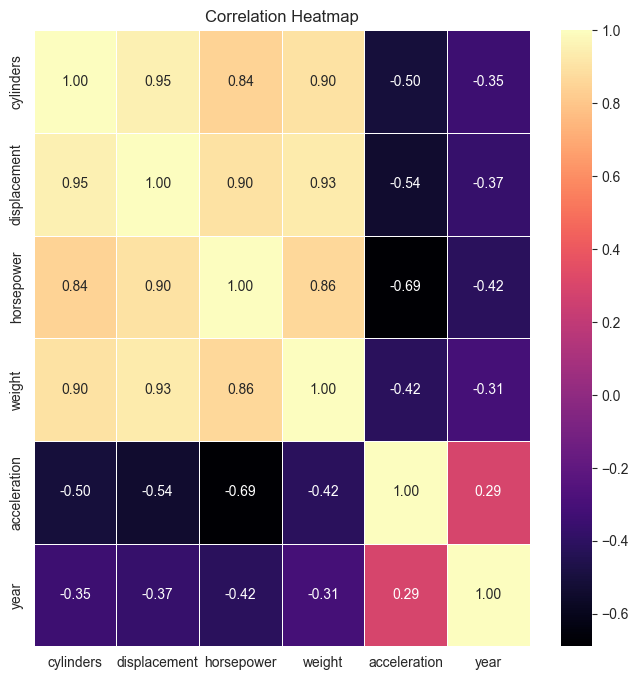

In [8]:
corr = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='magma', fmt = ".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

### Correlation Heatmap: Selected Features

Since I see that there are features that have a high correlation, I will exclude them. This will lead me with three variables to use.

Text(0.5, 1.0, 'Correlation Heatmap')

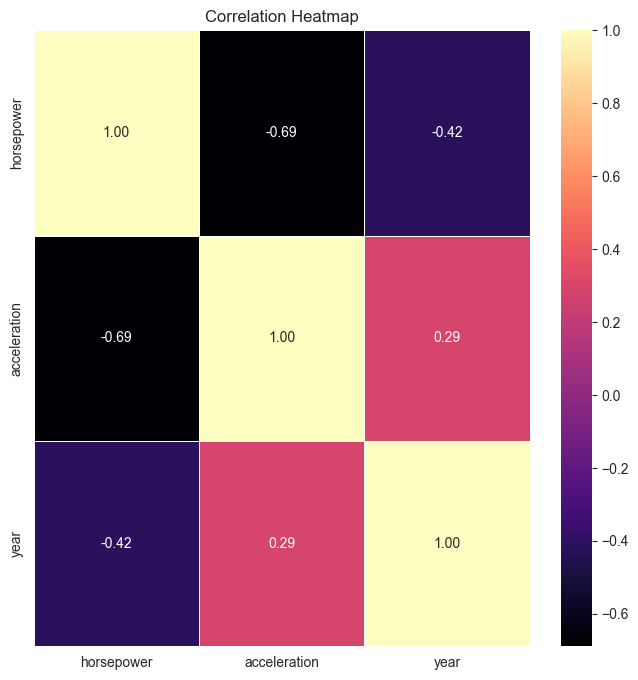

In [9]:
corr = Auto[['horsepower', 'acceleration', 'year']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='magma', fmt = ".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

## Pre-Processing for Model Training

### Splitting Data into Training Set and Test Set

This selection of features excludes 'displacement' and 'weight' since I can see a high correlation between 'displacement' and 'weight' in the scatterplots.

In [10]:
#from patsy import dmatrices

train_data = Auto.iloc[0:278]
test_data = Auto.iloc[278: ]

y_train, X_train = dmatrices('mpg01 ~ horsepower+year+acceleration', train_data, return_type = "dataframe")
y_test, X_test = dmatrices('mpg01 ~ horsepower+year+acceleration', test_data, return_type = "dataframe")

## Linear Discriminant Analysis

### Training LDA model

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1).fit(X_train, y_train.values.ravel())

#Predicting for training set
y_predicted_LDA_train = lda.predict(X_train)
y_predicted_proba_LDA_train = lda.predict_proba(X_train)

#Predicting for test set
y_predicted_LDA_test = lda.predict(X_test)
y_predicted_proba_LDA_test = lda.predict_proba(X_test)


### Visualizing Accuracy: Training Set

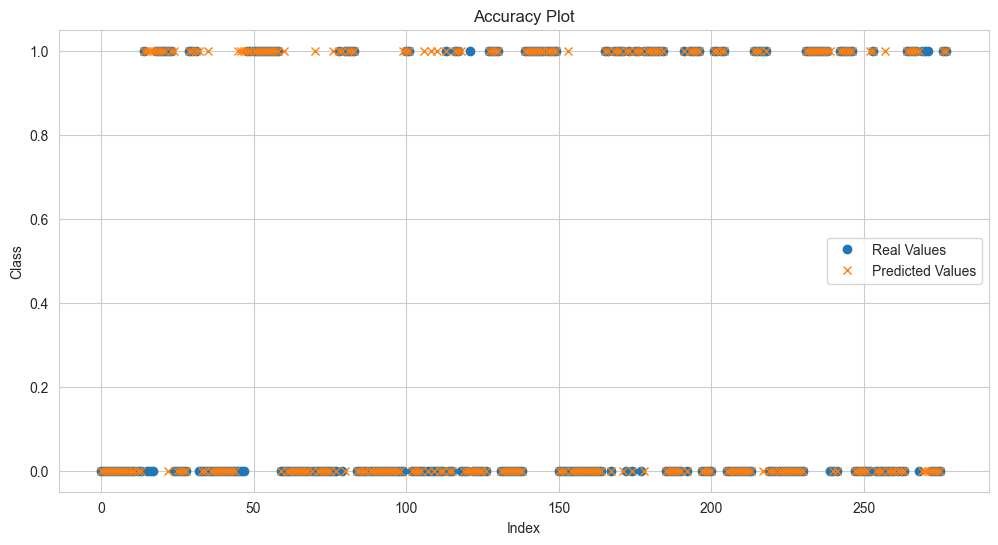

In [41]:
comparison_LDA = pd.DataFrame({'Predicted': y_predicted_LDA_train, 'Real Values': y_train.values.reshape(-1)})
plt.figure(figsize=(12, 6))
plt.plot(comparison_LDA.index, comparison_LDA['Real Values'], marker='o', linestyle='', label='Real Values')
plt.plot(comparison_LDA.index, comparison_LDA['Predicted'], marker='x', linestyle='', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

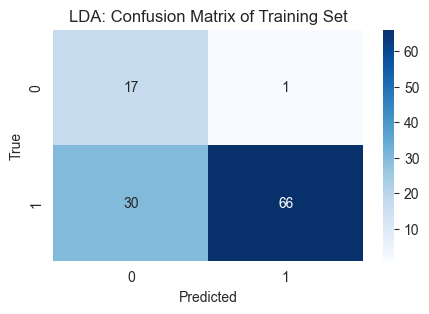

In [165]:
conf_matrix_LDA = confusion_matrix(comparison_LDA['Real Values'], comparison_LDA['Predicted'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_LDA, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("LDA: Confusion Matrix of Training Set")
plt.show()

### Visualizing Accuracy: Test Set

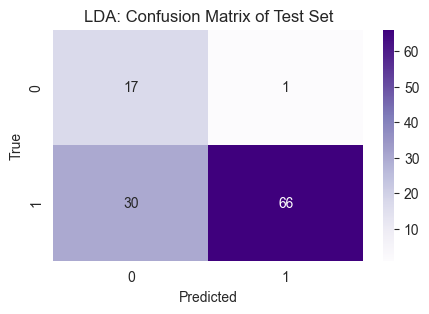

In [166]:
comparison_LDA = pd.DataFrame({'Predicted': y_predicted_LDA_test, 'Real Values': y_test.values.reshape(-1)})
conf_matrix = confusion_matrix(comparison_LDA['Real Values'], comparison_LDA['Predicted'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("LDA: Confusion Matrix of Test Set")
plt.show()

## Logistic Regression

### Training Logistic Regression Model

In [81]:
# from sklearn.linear_model import LogisticRegression
logit = sm.Logit(y_train, X_train).fit()
print(logit.summary())

# Predicting for training set
y_predicted_proba_logreg_train = logit.predict(X_train)     
y_predicted_logreg_train = np.round(y_predicted_proba_logreg_train)

# Predicting for test set
y_predicted_proba_logreg_test = logit.predict(X_test)
y_predicted_logreg_test = np.round(y_predicted_proba_logreg_test)

Optimization terminated successfully.
         Current function value: 0.258758
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  278
Model:                          Logit   Df Residuals:                      274
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.6039
Time:                        10:22:10   Log-Likelihood:                -71.935
converged:                       True   LL-Null:                       -181.60
Covariance Type:            nonrobust   LLR p-value:                 2.790e-47
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.8120      6.914      3.010      0.003       7.260      34.364
horsepower      -0.1765

### Visualizing Accuracy: Training Set

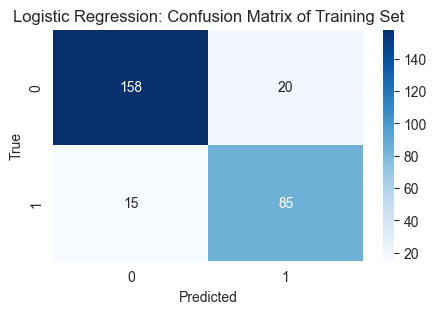

In [167]:
# Creating a dataframe contrasting the predicted and real values. With the purpose of using it for the confusion matrix and easier visualization
comparison_logreg = pd.DataFrame({'Predicted': y_predicted_logreg_train, 'Real Values': y_train.values.reshape(-1)})

# Obtaining the confusion matrix of the logistic regression model with training data and plotting it using a heatmap
conf_matrix_logreg = confusion_matrix(comparison_logreg['Real Values'], comparison_logreg['Predicted'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix_logreg, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Logistic Regression: Confusion Matrix of Training Set")
plt.show()

### Visualizing Accuracy: Test Set

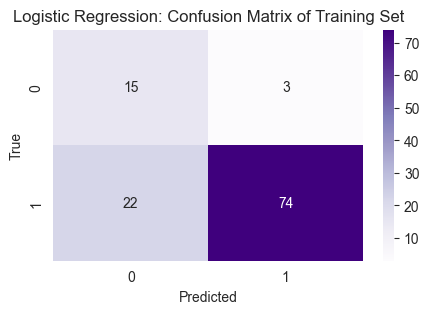

In [168]:
# Creating a dataframe contrasting the predicted and real values. With the purpose of using it for the confusion matrix and easier visualization
comparison_logreg = pd.DataFrame({'Predicted': y_predicted_logreg_test, 'Real Values': y_test.values.reshape(-1)})

# Obtaining the confusion matrix of the logistic regression model with test data and plotting it using a heatmap
conf_matrix_logreg = confusion_matrix(comparison_logreg['Real Values'], comparison_logreg['Predicted'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix_logreg, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Logistic Regression: Confusion Matrix of Training Set")
plt.show()

## Naive Bayes

### Training NB Model and Predicting for Training Set

In [84]:
# from sklearn.naive_bayes import GaussianNB as NB
NB_model = NB().fit(X_train, y_train.values.ravel())

# Predicting for training set
y_predicted_NB_train = NB_model.predict(X_train)
y_predicted_proba_NB_train = NB_model.predict_proba(X_train)

y_predicted_NB_test = NB_model.predict(X_test)
y_predicted_proba_NB_test = NB_model.predict_proba(X_test)

### Visualizing Accuracy: Training Set

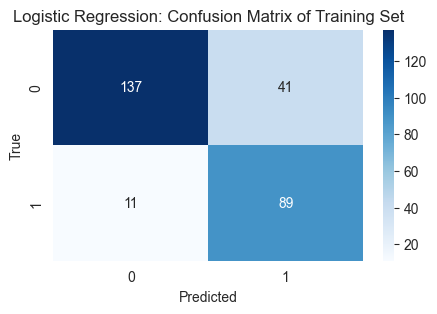

In [169]:
comparison_NB = pd.DataFrame({'Predicted': y_predicted_NB_train, 'Real Values': y_train.values.reshape(-1)})

conf_matrix_NB = confusion_matrix(comparison_NB['Real Values'], comparison_NB['Predicted'])

plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix_NB, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Logistic Regression: Confusion Matrix of Training Set")
plt.show()

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


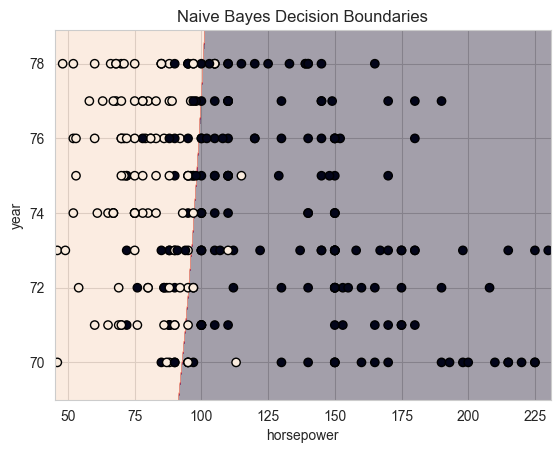

In [53]:
features = ['horsepower', 'year', 'acceleration']

mesh_step = 0.1
x_min, x_max = train_data[features[0]].min() - 1, train_data[features[0]].max() + 1
y_min, y_max = train_data[features[1]].min() - 1, train_data[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                     np.arange(y_min, y_max, mesh_step))

#Note that here I am creating new values for the other features, remaining as constant
acceleration_mean = train_data['acceleration'].mean()
other_features = np.full_like(xx, acceleration_mean)

intercept_column = np.ones_like(xx)

mesh_input = np.c_[intercept_column.ravel(), xx.ravel(), yy.ravel(), other_features.ravel()]


Z = NB_model.predict(mesh_input)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(train_data[features[0]], train_data[features[1]], c=y_train.values.ravel(), marker='o', edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Naive Bayes Decision Boundaries')
plt.show()


### Visualizing Accuracy: Test Set

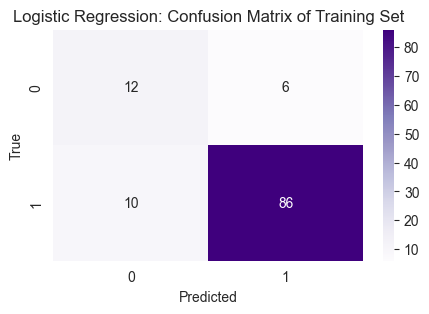

In [170]:
comparison_NB = pd.DataFrame({'Predicted': y_predicted_NB_test, 'Real Values': y_test.values.reshape(-1)})

conf_matrix_NB = confusion_matrix(comparison_NB['Real Values'], comparison_NB['Predicted'])

plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix_NB, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Logistic Regression: Confusion Matrix of Training Set")
plt.show()

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


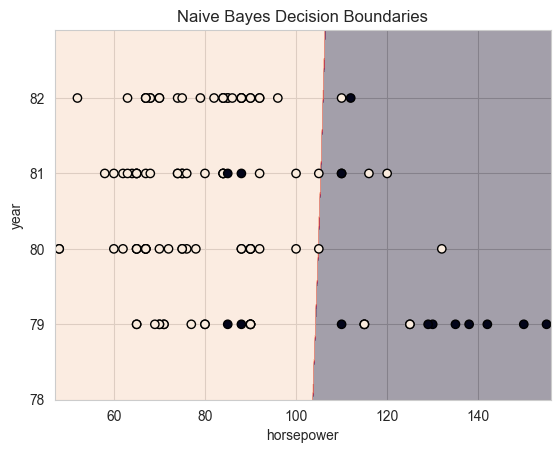

In [86]:
features = ['horsepower', 'year', 'acceleration']

#mesh
mesh_step = 0.1
x_min, x_max = test_data[features[0]].min() - 1, test_data[features[0]].max() + 1
y_min, y_max = test_data[features[1]].min() - 1, test_data[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                     np.arange(y_min, y_max, mesh_step))

# Generate synthetic values for the other features (e.g., acceleration)
# For simplicity, we'll use the mean value for acceleration
acceleration_mean = test_data['acceleration'].mean()
other_features = np.full_like(xx, acceleration_mean)

intercept_column = np.ones_like(xx)

mesh_input = np.c_[intercept_column.ravel(), xx.ravel(), yy.ravel(), other_features.ravel()]

Z = NB_model.predict(mesh_input)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(test_data[features[0]], test_data[features[1]], c=y_test.values.ravel(), marker='o', edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Naive Bayes Decision Boundaries')
plt.show()


## Comparing Performance

### Obtaining Metrics for Each Model

In [157]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# I make these declarations to simplify code. y_<model> is simply the predicted y vector for the test set
y_lda = y_predicted_LDA_test
y_logreg = y_predicted_logreg_test
y_NB = y_predicted_NB_test

# Metrics for Linear Discriminant Analysis model
lda_accuracy = accuracy_score(y_test, y_lda)
lda_precision = precision_score(y_test, y_lda)
lda_recall = recall_score(y_test, y_lda)
lda_f1 = f1_score(y_test, y_lda)
lda_roc_auc = roc_auc_score(y_test, y_predicted_proba_LDA_test[:,1])

# Metrics for Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_logreg)
logreg_precision = precision_score(y_test, y_logreg)
logreg_recall = recall_score(y_test, y_logreg)
logreg_f1 = f1_score(y_test, y_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_predicted_proba_logreg_test.values)

# Metrics for Naive Bayes model
NB_accuracy = accuracy_score(y_test, y_NB)
NB_precision = precision_score(y_test, y_NB)
NB_recall = recall_score(y_test, y_NB)
NB_f1 = f1_score(y_test, y_NB)
NB_roc_auc = roc_auc_score(y_test, y_predicted_NB_test)

### Box Plots of Metrics Scores

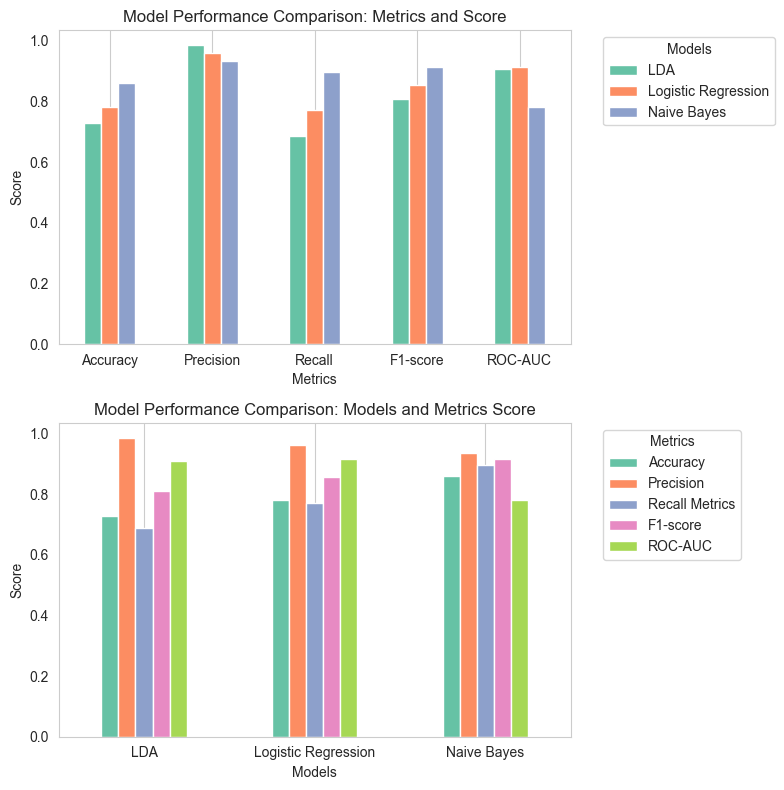

In [158]:
# I create two dicts in order to create a DataFrame
# This dict will be able to plot a series of bars for each metric and their respective score
metrics1_dict = {
    'LDA': {'Accuracy': lda_accuracy, 'Precision': lda_precision, 'Recall': lda_recall, 'F1-score': lda_f1, 'ROC-AUC': lda_roc_auc},
    'Logistic Regression': {'Accuracy': logreg_accuracy, 'Precision': logreg_precision, 'Recall': logreg_recall, 'F1-score': logreg_f1, 'ROC-AUC': logreg_roc_auc},
    'Naive Bayes': {'Accuracy': NB_accuracy, 'Precision': NB_precision, 'Recall': NB_recall, 'F1-score': NB_f1, 'ROC-AUC': NB_roc_auc}
}

# This dict will be able to plot a series of bars representing each model and their metric scores
metrics2_dict = {'Accuracy': {'LDA': lda_accuracy, 'Logistic Regression': logreg_accuracy, 'Naive Bayes': NB_accuracy}, 
                 'Precision': {'LDA': lda_precision, 'Logistic Regression': logreg_precision, 'Naive Bayes': NB_precision}, 
                 'Recall Metrics': {'LDA': lda_recall, 'Logistic Regression': logreg_recall, 'Naive Bayes': NB_recall}, 
                 'F1-score': {'LDA': lda_f1, 'Logistic Regression': logreg_f1, 'Naive Bayes': NB_f1}, 
                 'ROC-AUC': {'LDA': lda_roc_auc, 'Logistic Regression': logreg_roc_auc, 'Naive Bayes': NB_roc_auc}
                }

metrics1_df = pd.DataFrame(metrics1_dict)
metrics2_df = pd.DataFrame(metrics2_dict)


fig, axes = plt.subplots(2, 1, figsize=(8, 8))  

# First plot will show in the x-axis each of the metrics, each will have three bars representing each model and the y-axis will represent the score of such metrics
metrics1_df.plot(kind='bar', rot=0, ax=axes[0])
axes[0].set_title('Model Performance Comparison: Metrics and Score')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y')

# Second plot will show in the x-axis each of the models, each will have four bars representing each metric and the y-axis will represent the score of such metrics
metrics2_df.plot(kind='bar', rot=0, ax=axes[1])
axes[1].set_title('Model Performance Comparison: Models and Metrics Score')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Score')
axes[1].legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()